In [1]:
import pandas as pd
import numpy as np
import scipy.stats
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [ ]:
!pip install copulae

In [2]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

from scipy.stats import norm
from statsmodels.distributions.empirical_distribution import ECDF
import seaborn as sns
import matplotlib.pyplot as plt

In [1]:
from copulae import GaussianCopula

In [3]:
df_normalized = pd.read_csv('/project/data_normalized.csv')

In [73]:
df_og = pd.read_csv('/project/processed_data/grouped_bymean_data.csv')

In [62]:
df_group = pd.read_csv('/project/public_grouped.csv')

In [76]:
df_og.drop('geometry',axis=1,inplace=True)

In [74]:
df_og

,geometry,Storefront,Visible Sign of Business,Business WiFi,Business tables,Business Plugs,Business Internal CCTV,External CCTV,Number of female employees,Accepts credit card,Incline,Width,Ramp conditions,Ramp // Crosswalk,Ramp obstacles,Crosswalk width,Vertical signs,Crossing length,Access to people with disabilities,Pedestrian strip width,Strip services,Material,Status of maintenance,Continuity,Temporary obstacles,Benches,Trees,Planters,Commerciality,Percentage of parking accesses,Broken public property,Incivility,Obstacles,Physical aspects in poor condition,Poor infrastructure,Positive elements,Broken drain-cover,Drug addicts,Federal Judiciary,Panic button,Vandalism,graffiti,homelessness,inclined ramp,indication of security,mobile vendors,police presence,risky building,risky pavement,risky road,tourist map,trash,vehicle abandoned,Coffee Shop,Food joint,Ice Cream Shop,Lighting Stores,Restaurant,Open-Weekdays,Open-Weekends,crosswalk,Street Lighting,Public WiFi,number of bikes,Mean Inhabitants,Employment,Crime Degree,Deaths,Injuries,Run over,Metro,Metrobus,Trolleybus,RTP,Concessioned,e-bike,Total coverage of transport
0,POLYGON ((483895.66276413255 2147977.512360937...,0.0,0.0,0.000000,0.0,0.0,0.0,0.00,0.000000,0.000000,1.333333,2.000000,1.666667,0.666667,1.000000,2.000000,0.00000,0.666667,0.333333,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,2.333333,0.0,1.0,0.0,0.596230,2.0,1.5,0.333333,0.666667,2.000000,1.0,1.000000,0.000000,1.000000,1.0,0.500000,4.5
1,POLYGON ((484083.10588954407 2148038.433536382...,1.0,1.0,1.000000,1.0,1.0,1.0,1.00,2.000000,0.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.500000,0.000000,0.5,0.000000,0.000000,1.000000,0.500000,0.000000,0.0,0.0,0.0,0.640760,1.5,1.0,0.000000,0.000000,0.000000,1.0,1.000000,0.000000,1.000000,1.0,1.000000,5.0
2,POLYGON ((484117.82792597165 2148138.956983597...,0.0,0.0,0.000000,0.0,0.0,0.0,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,1.0,0.0,0.636282,1.5,1.0,0.000000,0.000000,0.000000,1.0,1.000000,0.000000,0.500000,1.0,1.000000,4.5
3,"POLYGON ((483986.4433715079 2148145.229713465,...",0.0,0.0,0.000000,0.0,0.0,0.0,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,1.0,0.0,0.572641,1.5,1.5,0.000000,0.000000,0.000000,1.0,1.000000,0.000000,0.500000,1.0,0.500000,4.0
4,"POLYGON ((484078.8851562059 2148441.591676034,...",0.0,0.0,0.000000,0.0,0.0,0.0,0.00,0.000000,0.000000,1.333333,2.000000,1.666667,0.666667,1.000000,2.000000,0.00000,0.666667,0.333333,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,2.333333,0.0,1.0,0.0,0.572641,2.5,1.5,0.000000,0.000000,0.000000,1.0,1.000000,0.000000,0.000000,1.0,0.500000,3.5
5,"POLYGON ((484066.193511239 2148417.846694127, ...",0.0,0.0,0.000000,0.0,0.0,0.0,0.00,0.000000,0.000000,1.333333,2.000000,1.666667,0.666667,1.000000,2.000000,0.00000,0.666667,0.333333,0.000000,0.0,0.0,0.000000,0.000000,0.000000,

We will drop the geometry column for further processing.

In [ ]:
df=df_geo.drop('geometry',axis=1)

In [ ]:
for column in df.columns:
    unique_values = df[column].unique()
    print(f"Unique values in column '{column}':")
    print(unique_values)
    print()


In [ ]:
column_means = df.mean()
column_means

# Trial 1: K-Means Clustering to get the centroids for each category with Standardization

K-means is an unsupervised learning algorithm used to partition a dataset into K distinct, non-overlapping subsets (or clusters) based on the data points' features. The way K-means works is by assigning each data point to the cluster whose mean (also called centroid or center) is nearest. The means are calculated by taking the average of all the data points in the cluster. One important thing to note is the process of feature scaling before applying K-means clustering. Since K-means clustering relies on the Euclidean distance between points, features with larger scales can disproportionately influence the clustering results. So, we will scale our data to have zero mean and unit variance before applying K-means clustering. 

In [77]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3) # where 'k' is the number of clusters you've chosen
kmeans.fit(df_og)  # 'df' is your dataframe or dataset


KMeans(n_clusters=3)

In [78]:
clusters = kmeans.labels_
clusters

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1,
       1, 2, 2, 2, 2, 2, 0, 0, 0, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1,
       1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int32)

In [80]:
from sklearn.metrics import silhouette_score
# Calculating the silhouette score
silhouette_avg = silhouette_score(df_og, clusters)

print(f"Silhouette Score: {silhouette_avg}")

Silhouette Score: 0.6455849042101122


KMeans(n_clusters=1, random_state=42)

KMeans(n_clusters=2, random_state=42)

KMeans(n_clusters=3, random_state=42)

KMeans(n_clusters=4, random_state=42)

KMeans(n_clusters=5, random_state=42)

KMeans(n_clusters=6, random_state=42)

KMeans(n_clusters=7, random_state=42)

KMeans(random_state=42)

KMeans(n_clusters=9, random_state=42)

KMeans(n_clusters=10, random_state=42)

<Figure size 1000x500 with 0 Axes>

Text(0.5, 1.0, 'Elbow Method')

Text(0.5, 0, 'Number of clusters')

Text(0, 0.5, 'WCSS')

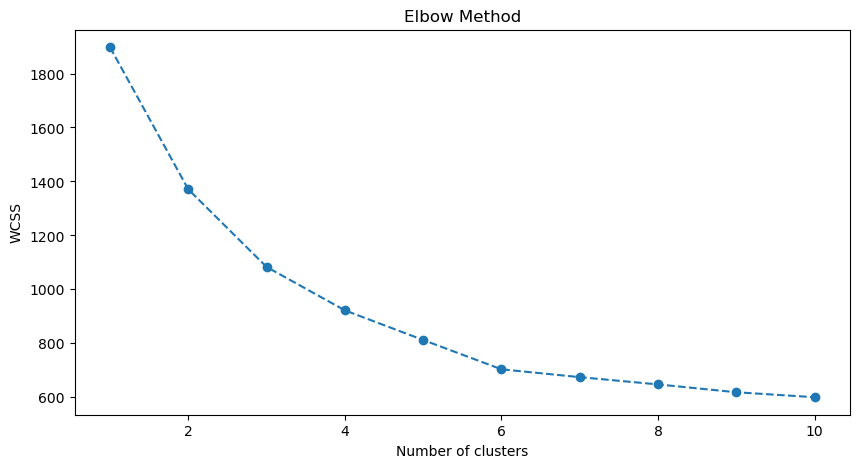

In [41]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs

# Generate some sample data

# Calculate WCSS for different number of clusters
wcss = []
max_clusters = 10
for i in range(1, max_clusters + 1):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(df_normalized)
    # Inertia method returns wcss for that model
    wcss.append(kmeans.inertia_)

# Plot the Elbow Method graph
plt.figure(figsize=(10,5))
plt.plot(range(1, max_clusters + 1), wcss, marker='o', linestyle='--')
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()


In [60]:
df_group['Cluster'] = clusters

# Group by cluster
grouped = df_group.groupby('Cluster')


df_group.to_csv('cluster_group.csv', index=False)


In [23]:
cluster_0_data = grouped.get_group(0)
cluster_0_data

,Storefront,Visible Sign of Business,Business WiFi,Business tables,Business Plugs,Business Internal CCTV,External CCTV,Number of female employees,Accepts credit card,Incline,Width,Ramp conditions,Ramp // Crosswalk,Ramp obstacles,Crosswalk width,Vertical signs,Crossing length,Access to people with disabilities,Pedestrian strip width,Strip services,Material,Status of maintenance,Continuity,Temporary obstacles,Benches,Trees,Planters,Commerciality,Percentage of parking accesses,Broken public property,Incivility,Obstacles,Physical aspects in poor condition,Poor infrastructure,Positive elements,Broken drain-cover,Drug addicts,Federal Judiciary,Panic button,Vandalism,graffiti,homelessness,inclined ramp,indication of security,mobile vendors,police presence,risky building,risky pavement,risky road,tourist map,trash,vehicle abandoned,Coffee Shop,Food joint,Ice Cream Shop,Lighting Stores,Restaurant,Open-Weekdays,Open-Weekends,crosswalk,Street Lighting,Public WiFi,number of bikes,Mean Inhabitants,Employment,Crime Degree,Deaths,Injuries,Run over,Metro,Metrobus,Trolleybus,RTP,Concessioned,e-bike,Total coverage of transport,Cluster
1,1.0,1.0,1.000000,1.0,1.0,1.0,1.00,0.200000,0.75,1.00,0.00,0.0,0.0,1.0,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,0.500000,0.000000,0.5,0.000000,0.000000,1.000000,0.500000,0.000000,0.0,0.00,0.000000,0.526674,0.125,1.0,1.0,1.0,1.00,1.0,1.0,0.000000,1.000000,1.0,1.000000,0.6,0
12,1.0,1.0,1.000000,1.0,1.0,1.0,1.00,0.200000,0.75,1.00,0.00,0.0,0.0,1.0,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.500000,0.000000,0.5,0.000000,0.000000,1.000000,0.500000,0.000000,0.0,0.50,0.833333,0.547153,0.250,1.0,1.0,1.0,1.00,1.0,1.0,0.000000,1.000000,1.0,1.000000,0.6,0
13,1.0,1.0,1.000000,1.0,1.0,1.0,1.00,0.266667,1.00,0.50,1.00,1.0,1.0,0.0,1.000000,1.0,0.000000,1.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,0.666667,0.000000,0.0,0.000000,0.333333,1.000000,1.000000,1.000000,0.0,0.50,0.000000,0.547153,0.250,1.0,1.0,1.0,1.00,1.0,1.0,0.000000,1.000000,1.0,1.000000,0.6,0
15,1.0,1.0,1.000000,1.0,1.0,1.0,1.00,0.100000,0.00,0.50,1.00,1.0,1.0,0.0,1.000000,0.0,1.000000,1.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.250000,0.750000,0.0,0.000000,0.000000,1.000000,0.250000,1.000000,0.0,0.50,0.000000,0.526674,0.375,1.0,1.0,0.8,0.00,1.0,1.0,0.000000,1.000000,1.0,1.000000,0.6,0
26,1.0,1.0,1.000000,1.0,1.0,1.0,1.00,0.100000,0.00,0.50,1.00,1.0,1.0,0.0,1.000000,0.0,1.000000,1.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,0.250000,0.750000,0.0,0.000000,0.000000,1.000000,0.250000,1.000000,0.0,0.50,0.000000,0.547153,0.875,1.0,1.0,1.0,1.00,1.0,1.0,0.000000,0.000000,1.0,1.000000,0.2,0
29,1.0,1.0,1.000000,1.0,1.0,1.0,1.00,0.100000,0.00,0.50,1.00,1.0,1.0,0.0,1.000000,0.0,1.000000,1.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,0.250000,0.750000,0.0,0.000000,0.000000,1.000000,0.250000,1.000000,0.0,0.50,0.000000,0.547153,0.625,1.0,1.0,1.0,1.00,1.0,1.0,0.000000,1.000000,1.0,1.000000,0.6,0
30,1.0,1.0,1.000000,1.0,1.0,1.0,1.00,0.100000,0.00,0.50,1.00,1.0,1.0,0.0,1.000000,0.0,1.000000,1.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,0.250000,0.750000,0.0,0.000000,0.000000,1.000000,0.250000,1.000000,0.0,0.50,0.000000,0.547153,0.625,1.0,1.0,1.0,1.00,1.0,1.0,0.000000,1.000000,1.0,1.000000,0.6,0
33,1.0,1.0,1.000000,1.0,1.0,1.0,1.00,0.266667,1.00,0

In [21]:
df_normalized.head()

,Storefront,Visible Sign of Business,Business WiFi,Business tables,Business Plugs,Business Internal CCTV,External CCTV,Number of female employees,Accepts credit card,Incline,Width,Ramp conditions,Ramp // Crosswalk,Ramp obstacles,Crosswalk width,Vertical signs,Crossing length,Access to people with disabilities,Pedestrian strip width,Strip services,Material,Status of maintenance,Continuity,Temporary obstacles,Benches,Trees,Planters,Commerciality,Percentage of parking accesses,Broken public property,Incivility,Obstacles,Physical aspects in poor condition,Poor infrastructure,Positive elements,Broken drain-cover,Drug addicts,Federal Judiciary,Panic button,Vandalism,graffiti,homelessness,inclined ramp,indication of security,mobile vendors,police presence,risky building,risky pavement,risky road,tourist map,trash,vehicle abandoned,Coffee Shop,Food joint,Ice Cream Shop,Lighting Stores,Restaurant,Open-Weekdays,Open-Weekends,crosswalk,Street Lighting,Public WiFi,number of bikes,Mean Inhabitants,Employment,Crime Degree,Deaths,Injuries,Run over,Metro,Metrobus,Trolleybus,RTP,Concessioned,e-bike,Total coverage of transport,Cluster
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.333333,1.0,0.833333,0.666667,0.0,1.0,0.0,0.666667,0.333333,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.777778,0.0,0.5,0.0,0.730327,0.250,0.8,0.333333,0.866667,0.0,1.0,1.0,0.0,1.0,1.0,0.5,0.4,1
1,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.2,0.75,1.000000,0.0,0.000000,0.000000,1.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,0.5,0.0,0.5,0.0,0.0,1.0,0.5,0.000000,0.0,0.0,0.0,0.526674,0.125,1.0,1.000000,1.000000,1.0,1.0,1.0,0.0,1.0,1.0,1.0,0.6,0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,1.000000,0.0,0.000000,0.000000,1.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.5,0.0,0.547153,0.125,1.0,1.000000,1.000000,1.0,1.0,1.0,0.0,0.5,1.0,1.0,0.4,1
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,1.000000,0.0,0.000000,0.000000,1.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.5,0.0,0.838209,0.125,0.8,1.000000,1.000000,1.0,1.0,1.0,0.0,0.5,1.0,0.5,0.2,1
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.333333,1.0,0.833333,0.666667,0.0,1.0,0.0,0.666667,0.333333,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.777778,0.0,0.5,0.0,0.838209,0.375,0.8,1.000000,1.000000,1.0,1.0,1.0,0.0,0.0,1.0,0.5,0.0,1


In [ ]:
# Initialize a new scaler instance
scaler = StandardScaler()

# Fit the scaler and transform the data
df_scaled = scaler.fit_transform(df)

In [ ]:
# Set number of clusters
# 3 for our 3 categories: A - Desirable, B - Acceptable, C - Inadequate
k = 3

# Create a KMeans instance with k clusters
kmeans = KMeans(n_clusters=k, random_state=0)

# Fit the model to your scaled data
kmeans.fit(df_scaled)

# Get the coordinates of the cluster centers in the scaled space
scaled_centroids = kmeans.cluster_centers_

In [ ]:
# Transform the scaled centroids back to the original feature space
original_centroids = scaler.inverse_transform(scaled_centroids)

The values for the centroids found by K-means using standardization do not follow the trends of the original data. This suggests that standardization may not have been suitable for this task. We will implement min-max normalization to test if it performs better.

In [ ]:
original_centroids[0]

In [ ]:
np.array(df.iloc[40])

# Trial 2: K-Means Clustering to get the centroids for each category with Min-Max Normalization

We perform this operation on numerical columns, as it does not make sense for binary or categorical data.

In [ ]:
# Set numerical columns
df_columns_to_normalize = ['Number of female employees', 'Incline','Width','Ramp conditions',
                           'Crosswalk width','Public WiFi', 'number of bikes', 
                           'Employment','Broken public property',
                           'Crime Degree', 'school_count', 'hospitals_count',
                           'Injuries', 'Collision', 'Run over', 'Total coverage of transport']

n_scaler = MinMaxScaler()

# Create a copy of DataFrame
df_normalized = df.copy()

df_normalized[df_columns_to_normalize] = n_scaler.fit_transform(df_normalized[df_columns_to_normalize])


In [ ]:
# Set number of clusters
# 3 for our 3 categories: A - Desirable, B - Acceptable, C - Inadequate
k = 3

# Create a KMeans instance with k clusters
kmeans_n = KMeans(n_clusters=k, random_state=0)

# Fit the model to your scaled data
kmeans_n.fit(df_normalized)

# Get the coordinates of the cluster centers in the scaled space
scaled_centroids_n = kmeans_n.cluster_centers_

In [ ]:
# Get the indices of the columns you normalized in the original dataframe
column_indices = [df.columns.get_loc(col) for col in df_columns_to_normalize]

# Select only the centroids for these columns
scaled_centroids_subset = scaled_centroids_n[:, column_indices]

# Now you can apply inverse_transform
original_centroids_n = n_scaler.inverse_transform(scaled_centroids_subset)


In [ ]:
original_centroids_n[0]
scaled_centroids_subset[0]
scaled_centroids_n[0]

# Trial 3: Univariate Percentiles with Normalization

We had already normalized the data using MinMaxScaler in Trial 2. We will use that version of the DataFrame for Trial 3 as well.

In [ ]:
df_normalized.head(1)

## Transforming to Maximization Criteria

The direction of preference (i.e., whether higher or lower values are better) determines whether a criterion is a maximization or minimization criterion. We will align all criteria in a way such that higher values are always better, which simplifies further analysis.The minimization criteria were transformed to maximization criteria by applying a reversed scale min–max normalization. The maximization criteria were normalized using a standard min–max normalization.

In [ ]:
df_normalized.columns

In [ ]:
# Reverse the scale of the minimization criteria by subtracting from 1
minimization_criteria = ['Crime Degree', 'Broken public property', 'homelessness',
                         'risky road','Physical aspects in poor condition', 
                         'Incivility', 'Obstacles','risky building', 'risky pavement',
                        'police presence','Ramp obstacles','Poor infrastructure',
                        'Drug addicts','trash', 'vehicle abandoned','not painted crosswalk',
                        'Flooding','Deaths', 'Injuries', 'Collision','Run over',]

df_normalized[minimization_criteria] = 1 - df_normalized[minimization_criteria]

In [ ]:
# initialize an empty list to store the percentile values
perc80 = []

# iterate over the columns in the DataFrame
for column in df_normalized.columns:
    # calculate the 90th percentile for the current column
    percentile_value = np.percentile(df_normalized[column], 90)
    # append the percentile value to the list
    perc80.append(percentile_value)

# convert the list of percentiles to a numpy array
perc80 = np.array(perc80)

perc80

In [ ]:
# initialize an empty list to store the percentile values
perc60 = []

# iterate over the columns in the DataFrame
for column in df_normalized.columns:
    # calculate the 90th percentile for the current column
    percentile_value = np.percentile(df_normalized[column], 60)
    # append the percentile value to the list
    perc60.append(percentile_value)

# convert the list of percentiles to a numpy array
perc60 = np.array(perc60)

perc60

In [ ]:
# initialize an empty list to store the percentile values
perc30 = []

# iterate over the columns in the DataFrame
for column in df_normalized.columns:
    # calculate the 90th percentile for the current column
    percentile_value = np.percentile(df_normalized[column], 30)
    # append the percentile value to the list
    perc30.append(percentile_value)

# convert the list of percentiles to a numpy array
perc30 = np.array(perc30)

perc30

# Synthetic Data Generation using Percentiles

We want to generate synthetic data that respects both the categorization of the percentiles and the correlations between the variables, hence we will follow a Copula-based approach. Copulas are statistical constructs that allow modeling the dependency structure (correlations) separately from the marginal distributions of each variable (which can be modeled using percentiles). They can capture a wide range of complex dependency structures and are particularly useful when dealing with multivariate data where the dependency between the variables is complex. By sampling from the copula, we are generating data that follows the same joint distribution as the original data, meaning that we respect the joint distribution of the original data

As our original data spans different scales and we have already scaled our data using MinMaxScaler as a preprocessing step before any analysis, we will apply Copula on the scaled dataset. We apply on the scaled dataset and not the original dataset as different variables represent fundamentally different things measured in different units, like Crime Degree and number of bikes in a block.

In [9]:
# Calculate the ECDF for each variable
ecdfs = {col: ECDF(df_normalized[col]) for col in df_normalized.columns}

# Transform your data into uniform(0, 1) variables
df_normalized_uniform = df_normalized.copy()
for col, ecdf in ecdfs.items():
    df_normalized_uniform[col] = ecdf(df_normalized[col])


In [10]:
# Fit a copula to the transformed data
copula = GaussianCopula(dim=len(df_normalized.columns))
copula.fit(df_normalized_uniform.values)

/opt/anaconda/envs/Python3/lib/python3.9/site-packages/scipy/stats/stats.py:4023: PearsonRConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(PearsonRConstantInputWarning())
/opt/anaconda/envs/Python3/lib/python3.9/site-packages/scipy/optimize/_numdiff.py:557: RuntimeWarning: invalid value encountered in subtract
  df = fun(x) - f0


In [19]:
# Compute uniform percentiles corresponding to original percentiles
uniform_percentiles = {col: df_normalized[col].quantile([0.2, 0.6, 0.8]).values for col in df_normalized.columns}


In [20]:
# Generate synthetic data
n_samples = 500  
synthetic_data = copula.random(n_samples)


In [21]:
# Define a function to map uniform data to specific percentiles
def map_to_percentiles(data, percentiles):
    data_mapped = data.copy()
    for i in range(len(percentiles) - 1):
        mask = (data >= percentiles[i]) & (data < percentiles[i + 1])
        data_mapped[mask] = np.mean(percentiles[i:i + 2])
    return data_mapped

# Map synthetic uniform data to uniform percentiles
synthetic_data_mapped = synthetic_data.copy()
for i, col in enumerate(df_normalized.columns):
    synthetic_data_mapped[:, i] = map_to_percentiles(synthetic_data[:, i], uniform_percentiles[col])

# Transform synthetic data from uniform to original distribution
synthetic_data_inverse_transformed = pd.DataFrame(
    {col: ecdfs[col](synthetic_data_mapped[:, i]) for i, col in enumerate(df_normalized.columns)},
    index=range(synthetic_data_mapped.shape[0])  # set index to be from 0 to number of samples
)


In [22]:
synthetic_data_inverse_transformed.head()

,Storefront,Visible Sign of Business,Business WiFi,Business tables,Business Plugs,Business Internal CCTV,External CCTV,Number of female employees,Accepts credit card,Incline,Width,Ramp conditions,Ramp // Crosswalk,Ramp obstacles,Crosswalk width,Vertical signs,Crossing length,Access to people with disabilities,Pedestrian strip width,Strip services,Material,Status of maintenance,Continuity,Temporary obstacles,Benches,Trees,Planters,Commerciality,Percentage of parking accesses,Broken public property,Incivility,Obstacles,Physical aspects in poor condition,Poor infrastructure,Positive elements,Broken drain-cover,Drug addicts,Federal Judiciary,Panic button,Vandalism,graffiti,homelessness,inclined ramp,indication of security,mobile vendors,police presence,risky building,risky pavement,risky road,tourist map,trash,vehicle abandoned,Coffee Shop,Food joint,Ice Cream Shop,Lighting Stores,Restaurant,Open-Weekdays,Open-Weekends,crosswalk,Street Lighting,Public WiFi,number of bikes,Mean Inhabitants,Employment,Crime Degree,Deaths,Injuries,Run over,Metro,Metrobus,Trolleybus,RTP,Concessioned,e-bike,Total coverage of transport
0,0.481308,0.481308,0.490654,0.485981,0.481308,0.495327,0.476636,0.981308,0.939252,0.584112,0.425234,0.439252,0.434579,0.560748,0.504673,0.948598,0.775701,0.728972,0.883178,0.794393,0.794393,0.864486,0.887850,0.850467,0.990654,0.939252,0.985981,0.794393,0.878505,0.014019,0.079439,0.196262,0.196262,0.191589,0.672897,0.088785,0.018692,0.995327,0.850467,0.014019,0.070093,0.046729,0.004673,0.990654,0.990654,0.023364,0.009346,0.088785,0.084112,0.929907,0.03271,0.004673,0.920561,0.785047,1.000000,0.962617,0.957944,0.485981,0.654206,0.457944,0.953271,0.088785,0.971963,0.028037,0.065421,0.359813,0.004673,0.004673,0.102804,0.0,0.009346,0.453271,0.752336,0.0,0.266355,0.962617
1,0.481308,0.481308,0.490654,0.485981,0.481308,0.495327,0.476636,0.981308,0.939252,0.107477,0.425234,0.439252,0.434579,0.560748,0.504673,0.948598,0.775701,0.728972,0.836449,0.794393,0.794393,0.794393,0.813084,0.850467,0.981308,0.855140,0.794393,0.794393,0.794393,0.004673,0.079439,0.196262,0.196262,0.191589,0.672897,0.088785,0.018692,0.995327,0.850467,0.014019,0.070093,0.046729,0.004673,0.990654,0.990654,0.023364,0.135514,0.088785,0.084112,0.929907,0.03271,0.004673,0.733645,0.785047,1.000000,0.869159,0.957944,0.485981,0.654206,0.457944,0.757009,0.883178,0.827103,0.018692,0.098131,0.359813,0.004673,0.004673,0.500000,0.0,0.009346,0.630841,0.752336,0.0,0.070093,0.102804
2,0.481308,0.481308,0.490654,0.485981,0.481308,0.495327,0.476636,0.859813,0.939252,0.584112,0.425234,0.439252,0.434579,0.560748,0.504673,0.948598,0.584112,0.728972,0.794393,0.794393,0.794393,0.864486,0.813084,0.813084,0.967290,0.873832,0.957944,0.794393,0.878505,0.004673,0.079439,0.196262,0.196262,0.191589,0.672897,0.088785,0.018692,0.995327,0.850467,0.014019,0.070093,0.046729,0.004673,0.990654,0.990654,0.023364,0.009346,0.088785,0.084112,0.929907,0.03271,0.004673,0.920561,0.901869,0.990654,0.962617,0.906542,0.485981,0.654206,0.457944,0.953271,0.088785,0.883178,0.897196,0.850467,0.359813,0.023364,0.004673,0.500000,0.0,0.056075,0.630841,0.752336,0.0,0.084112,0.102804
3,0.481308,0.481308,0.490654,0.485981,0.481308,0.495327,0.476636,0.990654,0.939252,0.042056,0.425234,0.439252,0.434579,0.560748,0.504673,0.948598,0.584112,0.728972,0.794393,0.794393,0.794393,0.794393,0.887850,0.850467,0.990654,0.939252,0.976636,0.794393,0.794393,0.004673,0.079439,0.196262,0.196262,0.191589,0.672897,0.088785,0.018692,0.995327,0.850467,0.014019,0.070093,0.046729,0.004673,0.990654,0.990654,0.023364,0.135514,0.088785,0.084112,0.929907,0.03271,0.004673,0.920561,0.785047,0.990654,0.962617,0.859813,0.485981,0.654206,0.457944,0.757009,0.088785,0.883178,0.401869,0.065421,0.359813,0.023364,0.004673,0.500000,0.0,0.060748,0.630841,0.752336,0.0,0.266355,0.560748
4,0.481308,0.481308,0.490654,0.485981,0.481308,0.495327,0.476636,0.990654,0.939252,0.130841,0.425234,0.439252,0.434579,0.560748,0.504673,0.948598,0.775701,0.728972,0.836449,

In [34]:
# Function to assign categories
def assign_categories(x, p15, p75):
    if x <= p15:
        return 'Inadequate'
    elif x <= p75:
        return 'Acceptable'
    else:
        return 'Desirable'

# Compute percentiles
p15 = synthetic_data_inverse_transformed[col].quantile(0.15)
p75 = synthetic_data_inverse_transformed[col].quantile(0.75)

# Assign categories to each row
synthetic_data_inverse_transformed['category'] = synthetic_data_inverse_transformed[col].apply(lambda x: assign_categories(x, p15, p75))



<Figure size 800x600 with 0 Axes>

Text(0.0, 0.62, '0.62')

Text(1.0, 0.22, '0.22')

Text(2.0, 0.16, '0.16')

Text(0.5, 1.0, 'Ratios of each category')

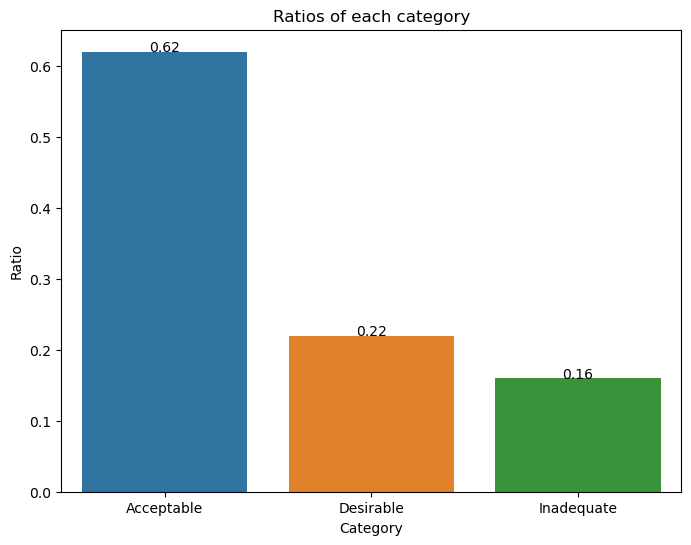

In [35]:
# Calculate the counts of each category
category_counts = synthetic_data_inverse_transformed['category'].value_counts()

# Calculate the ratios
category_ratios = category_counts / len(synthetic_data_inverse_transformed)

# Create a DataFrame for plotting
category_ratios_df = pd.DataFrame({'Category': category_ratios.index, 'Ratio': category_ratios.values})


plt.figure(figsize=(8, 6))
barplot = sns.barplot(x='Category', y='Ratio', data=category_ratios_df)

# Get the current axis for manipulation
ax = plt.gca()

# Loop over the bars
for p in ax.patches:
    # Get the height of the bar (which is also its value)
    height = p.get_height()
    # Write text on top of the bar
    ax.text(x = p.get_x()+(p.get_width()/2), 
            y = height, 
            s = '{:.2f}'.format(height),  # format the height to string
            ha = 'center')  # horizontal alignment is center

plt.title('Ratios of each category')
plt.show()


In [36]:
synthetic_data_inverse_transformed.to_csv('synthetic_data.csv', index=False)